# Hierarchial cluster analysis on sites' characteristics

Clustering techniques are an area of machine learning that are often used in business applications to group similar data points to discover trends and patterns.

This is an example notebook applying **Agglomerative Hierarchical Clustering** using *scikit-learn* using the sample data provided. 

## Import Libraries
---

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

## Explore Data
---


In [2]:
# read csv with sample data
data = pd.read_csv('./Data Innovation Data Set 2_energy.csv',index_col=['Index'])
# print dataframe's information
print(data.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
Float64Index: 154 entries, 1.0 to nan
Data columns (total 17 columns):
Electricity meter number         133 non-null object
Gas meter number                 133 non-null object
Opening Date                     133 non-null object
Electricity consumption (kWh)    133 non-null object
Gas consumption (kWh)            133 non-null object
Total floor area (m2)            133 non-null float64
Trading floor area (m2)          133 non-null float64
Max Covers                       133 non-null object
Building age (years)             133 non-null object
Heating type                     133 non-null object
Heating Delivery                 133 non-null object
Air Curtain Size (kW)            133 non-null float64
Outdoor heating                  131 non-null object
Water heating                    133 non-null object
Cooling systems                  133 non-null object
Walk-in Cellar                   133 non-null object
Walk-in fridge/freezer           133 non

In [3]:
# Transform Electricity consumption (kWh) column to numeric
data['Electricity consumption (kWh)'] = pd.to_numeric(data['Electricity consumption (kWh)'].str.replace(',',''), errors='coerce')

# Transform Gas consumption (kWh) column to numeric
data['Gas consumption (kWh)'] = pd.to_numeric(data['Gas consumption (kWh)'].str.replace(',',''), errors='coerce')

# Transform Max Cover column to numeric
data['Max Covers'] = pd.to_numeric(data['Max Covers'].str.replace(',',''), errors='coerce')

# Transform Building age column to numeric
data['Building age (years)'] = pd.to_numeric(data['Building age (years)'].str.replace(',',''), errors='coerce')

data.head()

Electricity meter number Gas meter number Opening Date  \
Index                                                          
1.0              2200017439925       4171232704   23.10.2004   
2.0              2200030523024         14607503   10.06.2003   
3.0              2200015296282       9171125407   29.06.2006   
4.0              2200012724640       9172677800   23.07.2007   
5.0              2199993738222       9177998700   17.09.2007   

       Electricity consumption (kWh)  Gas consumption (kWh)  \
Index                                                         
1.0                          96392.0               132359.0   
2.0                          84885.0               141057.0   
3.0                          75085.0               134405.0   
4.0                         128344.0               194865.0   
5.0                         103642.0               139287.0   

       Total floor area (m2)  Trading floor area (m2)  Max Covers  \
Index                                                               
1.0                    168.0                     93.0        68.0   
2.0                    199.0                     98.0        80.0   
3.0                    320.0                     90.0        70.0   
4.0                    291.0                    128.0        82.0   
5.0                    291.0                    128.0        94.0   

       Building age (years) Heating type Heating Delivery  \
Index                                                       
1.0                    60.0          Gas        Radiators   
2.0                    90.0          Gas        Radiators   
3.0                   105.0          Gas        Radiators   
4.0                    70.0          Gas        Radiators   
5.0                    90.0          Gas        Radiators   

       Air Curtain Size (kW) Outdoor heating Water heating Cooling systems  \
Index                                                                        
1.0                      3.0              No           Gas          Aircon   
2.0                      3.0              No           Gas         Aircon    
3.0                      3.0              No           Gas            None   
4.0                      3.0              No           Gas            None   
5.0                      3.0              No           Gas            None   

      Walk-in Cellar Walk-in fridge/freezer  
Index                                        
1.0                Y                      N  
2.0                Y                      N  
3.0                Y                      N  
4.0                Y                      N  
5.0                Y                      N

The data hold information on 154 entries/sites on 17 features, as shown above.

### Missing Values
---

In [4]:
# print if there are any missing values
print("\n Missing Values: \n", data.isna().sum())


 Missing Values: 
 Electricity meter number          21
Gas meter number                  21
Opening Date                      21
Electricity consumption (kWh)     39
Gas consumption (kWh)             26
Total floor area (m2)             21
Trading floor area (m2)           21
Max Covers                        25
Building age (years)             104
Heating type                      21
Heating Delivery                  21
Air Curtain Size (kW)             21
Outdoor heating                   23
Water heating                     21
Cooling systems                   21
Walk-in Cellar                    21
Walk-in fridge/freezer            21
dtype: int64


We can see that there is __missing information__ for each of the features examined. 

Specifically, 105 out of 154 entries do not hold a value for the _age of the building_ feature. Since we consider that the age of the building is an an important factor that we want to include in our analysis, we will continue on excluding the entries with missing values. The final data set that will be used holds 46 entry values, as shown below.


In [5]:
# drop missing values
data = data.dropna()
# print the new dataframe without the missing values
print('\nData without missing values:\n')
data.info()


Data without missing values:

<class 'pandas.core.frame.DataFrame'>
Float64Index: 46 entries, 1.0 to 50.0
Data columns (total 17 columns):
Electricity meter number         46 non-null object
Gas meter number                 46 non-null object
Opening Date                     46 non-null object
Electricity consumption (kWh)    46 non-null float64
Gas consumption (kWh)            46 non-null float64
Total floor area (m2)            46 non-null float64
Trading floor area (m2)          46 non-null float64
Max Covers                       46 non-null float64
Building age (years)             46 non-null float64
Heating type                     46 non-null object
Heating Delivery                 46 non-null object
Air Curtain Size (kW)            46 non-null float64
Outdoor heating                  46 non-null object
Water heating                    46 non-null object
Cooling systems                  46 non-null object
Walk-in Cellar                   46 non-null object
Walk-in fridge/freeze

### Statistical Summary
---

In the following __statistical summary__, we can see the minimum, maximum, average, standard deviation as well as quantile values with respect to each numeric column. 

Certain information on the categorical variables is also shown. For example, the 46 'Walk-in fridge/freezer' variable values can have the 'N', 'Y', 'y' unique values with 'Y' being the most frequent one (freq=34).


In [6]:
data.describe()

Electricity consumption (kWh)  Gas consumption (kWh)  \
count                      46.000000              46.000000   
mean                   143754.695652          211011.652174   
std                     53294.182310           43952.925401   
min                     75085.000000          132359.000000   
25%                    111407.250000          183542.000000   
50%                    125248.500000          206641.500000   
75%                    161584.500000          236804.500000   
max                    328468.000000          328619.000000   

       Total floor area (m2)  Trading floor area (m2)  Max Covers  \
count              46.000000                46.000000   46.000000   
mean              391.000000               208.652174  133.804348   
std               129.165871                85.762519   50.333828   
min               168.000000                90.000000   68.000000   
25%               297.250000               142.000000   98.250000   
50%               387.000000               190.500000  127.500000   
75%               481.250000               267.500000  161.250000   
max               666.000000               420.000000  302.000000   

       Building age (years)  Air Curtain Size (kW)  
count             46.000000              46.000000  
mean              77.369565               6.967391  
std               55.541920               3.787996  
min                6.000000               3.000000  
25%               40.000000               3.000000  
50%               70.000000               9.000000  
75%              110.000000               9.000000  
max              279.000000              18.000000

In [7]:
data.describe(include='O')

Electricity meter number Gas meter number Opening Date Heating type  \
count                        46               46           46           46   
unique                       46               46           46            3   
top               1300060290372         58694401   08.05.2014          Gas   
freq                          1                1            1           42   

       Heating Delivery Outdoor heating Water heating Cooling systems  \
count                46              46            46              46   
unique                3               2             3               3   
top           Radiators              No           Gas            None   
freq                 44              36            41              28   

       Walk-in Cellar Walk-in fridge/freezer  
count              46                     46  
unique              1                      3  
top                 Y                      Y  
freq               46                     34

In [8]:
print(data['Walk-in fridge/freezer'].unique())

['N' 'Y' 'y']


### Plots
---

Below we can review each attribute by looking at __box plots__

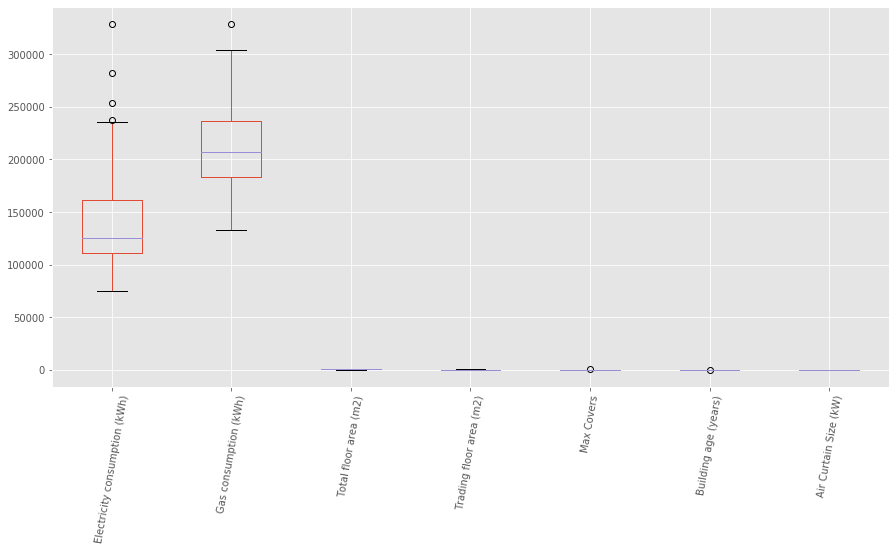

In [9]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,7)

data.boxplot()
plt.xticks(rotation=80)
plt.show()

There are some __outliers__ for the electricity, gas consumption, max covers and building age. Further analysis could be conducted on those outliers. Below we can see the remaining feauture values for the entry with the maximum electricity consumption (first outlier). 

In [10]:
data[data['Electricity consumption (kWh)']==data['Electricity consumption (kWh)'].max()]

Electricity meter number Gas meter number Opening Date  \
Index                                                          
46.0             1100014213836         58694401   16.10.2014   

       Electricity consumption (kWh)  Gas consumption (kWh)  \
Index                                                         
46.0                        328468.0               299243.0   

       Total floor area (m2)  Trading floor area (m2)  Max Covers  \
Index                                                               
46.0                   472.0                    335.0       113.0   

       Building age (years) Heating type Heating Delivery  \
Index                                                       
46.0                  120.0          Gas        Radiators   

       Air Curtain Size (kW) Outdoor heating Water heating Cooling systems  \
Index                                                                        
46.0                    13.5  Timed switches           Gas          Aircon   

      Walk-in Cellar Walk-in fridge/freezer  
Index                                        
46.0               Y                      Y

Below we review the underlying frequency distribution for each of the numerical variables included in the data set. 

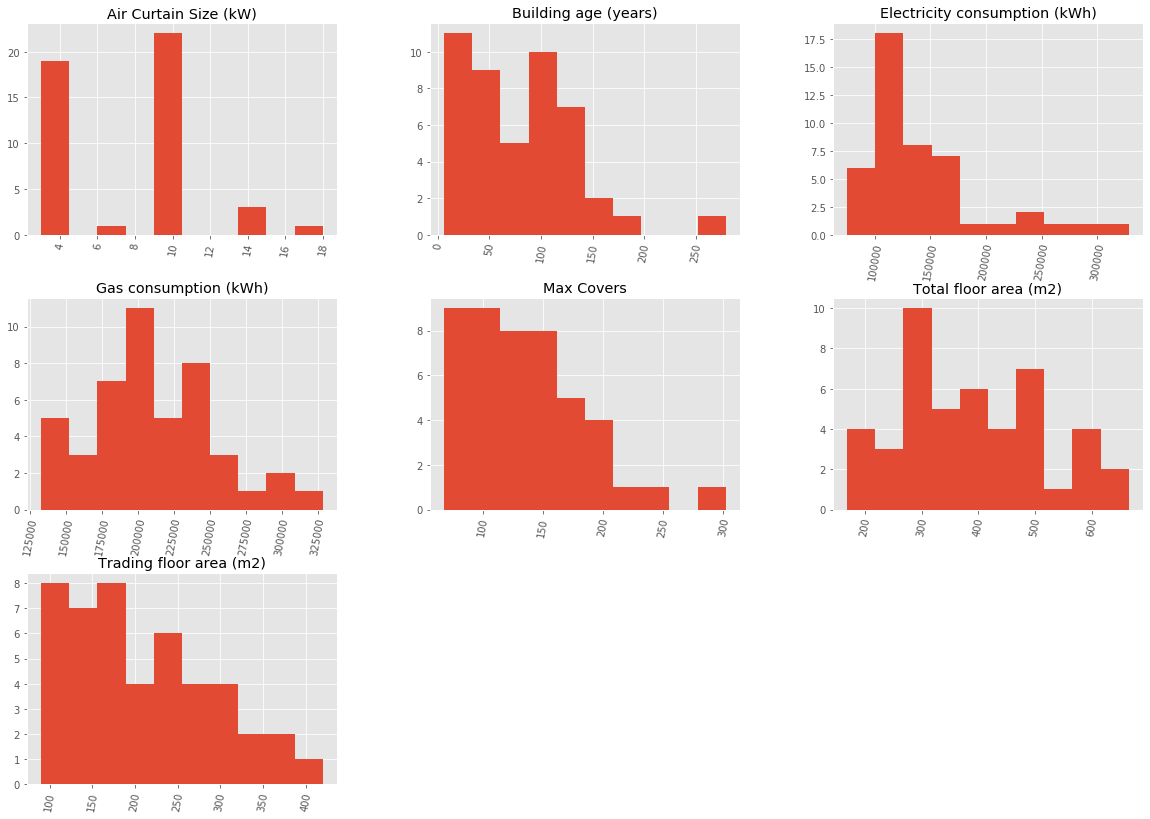

In [11]:
plt.rcParams['figure.figsize']=(20,14)
data.hist(xrot=80,xlabelsize=10)
plt.show()

The distribution for _building age, electricity consumption, max covers and trading floor area_ is right skewed. For example, most of the entries have trading floor area in the low range of 100-200 m2 while fewer sites have trading floor area that covers up to 300-400 m2. We can also see that a Gaussian-like shape for the _Gas consumption and total floor area_ variables.

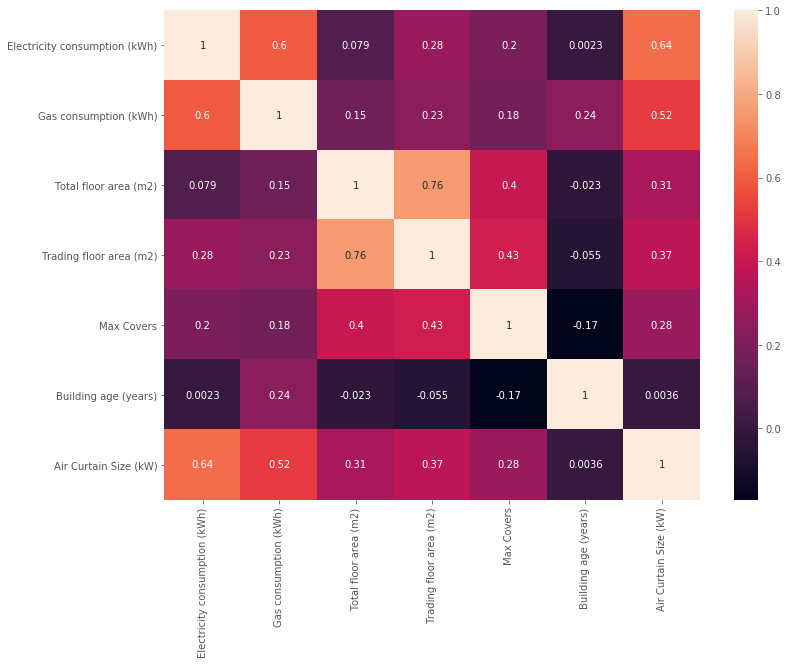

In [12]:
plt.figure(figsize = (12,9))
sns.heatmap(data.corr(), annot = True)
plt.show()

The __heatmap__ shows the correlations between the variables, the stronger the correlation the lighter the colour. For example, the _gas consumption_ shows a positive correlation with the _electricity consumption_ (cor=0.6) and _air curtain size_ (cor=0.64).

## Hierarhical Clustering
---

__Clustering methods__ are used to categorise samples into groups having similarity based on features. __Agglomerative Hierarchical__ based is a cluster formation method that attempts to identify relatively homogeneous groups of variables based on selected characteristics, using an algorithm that starts by treating each point as a separate cluster and then combining based on a similarity measure clusters until only one is left.


### Standardise Data
---

In this context, data standardisation means converting data values to have mean of 0 and a standard deviation of 1.
By putting all variables into the same range, you weight the variables equally.

In [13]:
# select numeric columns
df = data.iloc[:,3:9]
# add 'Air Curtain Size (kW)' column to dataframe
df = df.join(data[['Air Curtain Size (kW)']])
df.head()

# standardise the data
X_std = StandardScaler().fit_transform(df)
print('first row of standardised data:\n', X_std[0,:])

first row of standardised data:
 [-0.89852314 -1.8092486  -1.74553976 -1.36341771 -1.3218047  -0.31618461
 -1.0589323 ]


### Measures of dis/similarity
---

The choice of distance measures is a critical step in clustering. It defines how the similarity of two elements (x, y) is calculated and it will influence the shape of the clusters. The distance metric needs to define similarity in a way that is sensible for the the field of study. The most commonly preferred distance metric is _Euclidean distance_.


### Linkage Criteria
---
After selecting a distance metric, it is necessary to determine from where distance is computed. For example, it can be computed between the two most similar parts of a cluster (*single-linkage*), the two least similar bits of a cluster (*complete-linkage*), the center of the clusters (*average-linkage*), or some other criterion. Many linkage criteria have been developed, *Ward’s* method is the default. This method works out which observations to group based on reducing the sum of squared distances of each observation from the average observation in a cluster.

For the purposes of our example the *Euclidean distance* and the *Ward's* linkage criteria will be used.

### Dendrogram
---
The hierarchical clustering technique can be visualised using a *Dendrogram*, which shows the hierarchical relationship between the clusters. At the bottom of the dendrogram, each observation is considered its own cluster. Vertical lines extend up for each observation, and at various (dis)similarity values, these lines are connected to the lines from other observations with a horizontal line. The observations continue to combine until, at the top of the dendrogram, all observations are grouped together. The height of the vertical lines and the range of the (dis)similarity axis give visual clues about the strength of the clustering. Long vertical lines indicate more distinct separation between the groups.
Long vertical lines at the top of the dendrogram indicate that the groups represented by those lines
are well separated from one another. Shorter lines indicate groups that are not as distinct.

For the purposes of our example, the *Euclidean distance* and the *Ward's criteria* will be used

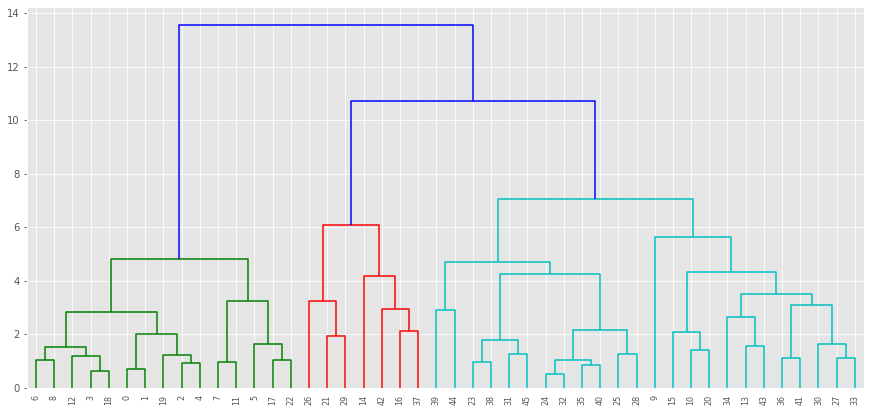

In [14]:
# create dendrogram
f = plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(X_std, method='ward'))


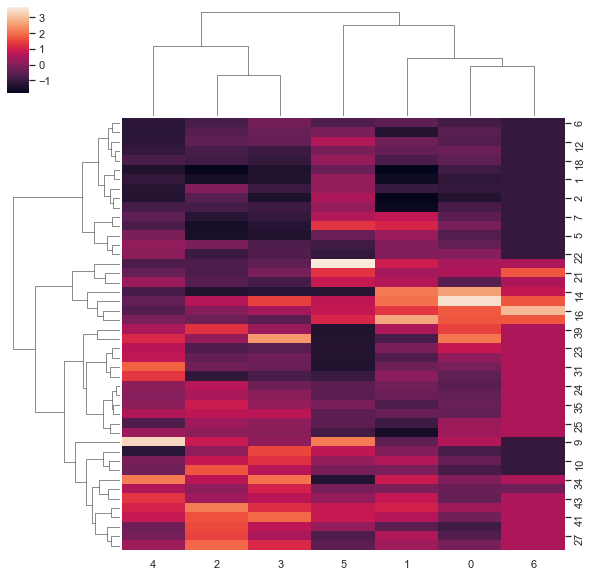

In [15]:
import seaborn as sns; sns.set(color_codes=True)

g = sns.clustermap(X_std,method="ward")

### Defining the Optimal Number of Clusters
---

The **optimal number of clusters** can be determined by the visual cutting of the dendrogram at a certain level. For example, if we draw a horizontal line after the first split counting from the top would give three set of clusters. The interpretation of the resulting hierarchical structure is context-dependent and often several solutions are equally good from a theoretical point of view.

Another way is by examining the **silhouette score**, which shows how well an observation is clustered and it estimates the average distance between clusters. Below we apply the average silhouette method which computes the average silhouette of observations for different values of clusters (k). The optimal number of clusters is the one that maximize the average silhouette over a range of possible values for k (Kaufman and Rousseeuw 1990).

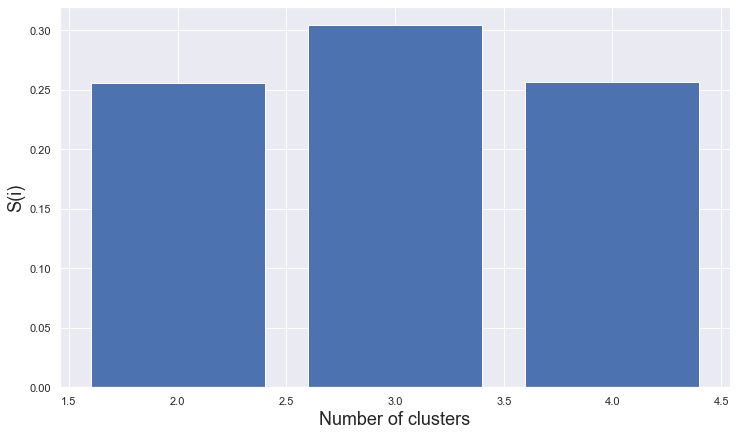

In [16]:
k = [2, 3, 4] 
hc_1 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
hc_2 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc_3 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')


# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_std, hc_1.fit_predict(X_std))) 
silhouette_scores.append( 
        silhouette_score(X_std, hc_2.fit_predict(X_std))) 
silhouette_scores.append( 
        silhouette_score(X_std, hc_3.fit_predict(X_std))) 

# Plotting a bar graph to compare the results 
f = plt.figure(figsize=(12, 7))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 18) 
plt.ylabel('S(i)', fontsize = 18) 
plt.show() 

Silhoutte score suggests **three number of clusters**.

### Agglomerative Hierarchical Clustering for Three Number of Clusters
---

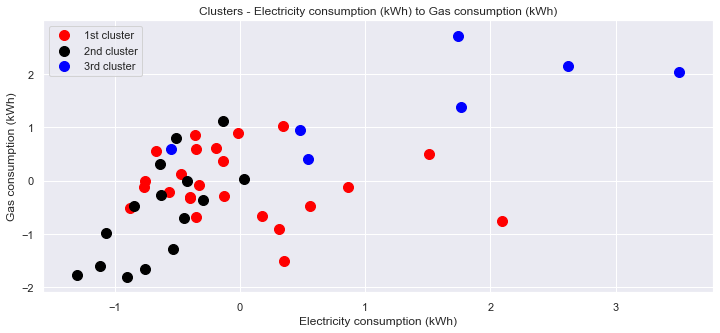

In [31]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward') 
# save clusters for chart
y_hc = hc.fit_predict(X_std)

# plot points belonging to each cluster
sns.set(font_scale = 1)
f = plt.figure(figsize=(12, 5))
plt.scatter(X_std[y_hc==0,0], X_std[y_hc==0,1], s=100, c='red',label='1st cluster')
plt.scatter(X_std[y_hc== 1,0], X_std[y_hc==1,1], s=100, c='black',label='2nd cluster')
plt.scatter(X_std[y_hc==2,0], X_std[y_hc==2,1], s=100, c='blue',label='3rd cluster')

plt.title('Clusters - Electricity consumption (kWh) to Gas consumption (kWh)')
plt.xlabel('Electricity consumption (kWh)')
plt.ylabel('Gas consumption (kWh)')
plt.legend()
plt.show()

We can see that observations with low electricity and gas consumption values are grouped in the second cluster, while observations with medium and high consumption values to the first and third cluster repsectively.

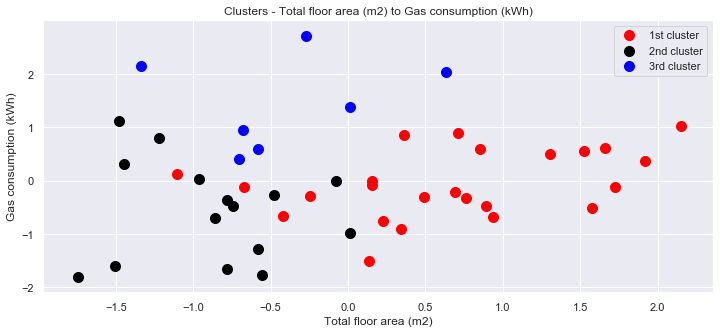

In [22]:
# plot points belonging to each cluster
sns.set(font_scale = 1)
f = plt.figure(figsize=(12, 5))
plt.scatter(X_std[y_hc==0,2], X_std[y_hc==0,1], s=100, c='red',label='1st cluster')
plt.scatter(X_std[y_hc== 1,2], X_std[y_hc==1,1], s=100, c='black',label='2nd cluster')
plt.scatter(X_std[y_hc==2,2], X_std[y_hc==2,1], s=100, c='blue',label='3rd cluster')
plt.title('Clusters - Total floor area (m2) to Gas consumption (kWh)')
plt.xlabel('Total floor area (m2)')
plt.ylabel('Gas consumption (kWh)')
plt.legend()
plt.show()

Moreover, sites with small to medium total floor area belong to the second cluster, while observations with medium to high total floor area belong to the first cluster. The third cluster holds point with high gas consumption values.


#### First Cluster
---

In [32]:
# pass the standardised data to a dataframe
X_std_df = pd.DataFrame(X_std, index=df.index,columns=['Electricity consumption (kWh)','Gas consumption (kWh)','Total floor area (m2)','Trading floor area (m2)','Max Covers','Building age (years)','Air Curtain Size (kW)'])
# pass the clustering results to a dataframe
clusters_df = pd.DataFrame(data=y_hc, index=df.index, columns=['cluster'])
# aggregate clustering results with original df
clusters_df = clusters_df.join(X_std_df)
#clusters_df

# select only the sites that belong to the first cluster
cluster_1_df = clusters_df[clusters_df['cluster']==0]
cluster_1_df

cluster  Electricity consumption (kWh)  Gas consumption (kWh)  \
Index                                                                  
10.0         0                       0.562367              -0.482135   
11.0         0                      -0.354375               0.593072   
14.0         0                      -0.327303              -0.087426   
16.0         0                      -0.756316              -0.012460   
21.0         0                      -0.762311              -0.117606   
26.0         0                       0.864425              -0.113627   
27.0         0                      -0.565106              -0.218199   
28.0         0                       0.310620              -0.914017   
30.0         0                      -0.673677               0.552564   
31.0         0                       0.348562              -1.507610   
33.0         0                      -0.880842              -0.509670   
34.0         0                      -0.125735              -0.284010   
35.0         0                      -0.399564              -0.314351   
36.0         0                      -0.134310               0.363916   
37.0         0                      -0.019193               0.895401   
39.0         0                      -0.347792              -0.691808   
40.0         0                       0.347462               1.018513   
42.0         0                       0.178695              -0.672623   
43.0         0                       1.511169               0.499197   
44.0         0                      -0.400645              -0.332455   
45.0         0                      -0.187220               0.612095   
47.0         0                      -0.355911               0.856502   
48.0         0                       2.089978              -0.760886   
50.0         0                      -0.468239               0.121763   

       Total floor area (m2)  Trading floor area (m2)  Max Covers  \
Index                                                               
10.0                0.892339                 0.169146    3.378528   
11.0                0.853201                 1.312674   -0.136678   
14.0                0.156551                 1.076895    0.586450   
16.0                0.156551                 1.560242   -1.201283   
21.0                1.722057                 0.676071   -0.217026   
26.0               -0.673168                -0.561769    0.706971   
27.0                0.688823                -0.278834    0.124451   
28.0                0.344411                 0.157357   -0.679024   
30.0                1.526369                 0.487447   -0.176852   
31.0                0.133068                 0.074834    0.325320   
33.0                1.573334                 0.746804   -0.257200   
34.0               -0.242654                -0.337779    1.851924   
35.0                0.493135                 0.133779    0.044104   
36.0                1.917745                 1.182996    0.325320   
37.0                0.712305                 2.043589    2.153227   
39.0                0.939304                 0.228091    0.124451   
40.0                2.152571                 1.241940    1.088622   
42.0               -0.422687                -0.255256    0.787319   
43.0                1.307198                 0.298824    0.506102   
44.0                0.759271                 0.711438    0.566363   
45.0                1.659437                 1.937488    0.867666   
47.0                0.360066                 0.699649    1.349752   
48.0                0.226998                 2.491569    1.168970   
50.0               -1.103682                -0.750392    1.369839   

       Building age (years)  Air Curtain Size (kW)  
Index                                               
10.0               2.141270              -1.058932  
11.0               0.229916              -1.058932  
14.0              -0.134151              -0.258205  
16.0               0.776018              -1.058932  
21.0              -0.

In [25]:
cluster_1_df.drop(['cluster'],axis=1).describe()

Electricity consumption (kWh)  Gas consumption (kWh)  \
count                      24.000000              24.000000   
mean                       -0.022719              -0.062744   
std                         0.718229               0.638921   
min                        -0.880842              -1.507610   
25%                        -0.417544              -0.489019   
50%                        -0.257262              -0.115617   
75%                         0.319830               0.512538   
max                         2.089978               1.018513   

       Total floor area (m2)  Trading floor area (m2)  Max Covers  \
count              24.000000                24.000000   24.000000   
mean                0.672189                 0.626950    0.610722   
std                 0.838833                 0.848667    0.975440   
min                -1.103682                -0.750392   -1.201283   
25%                 0.156551                 0.119043   -0.001092   
50%                 0.700564                 0.581759    0.536233   
75%                 1.361991                 1.197732    1.108709   
max                 2.152571                 2.491569    3.378528   

       Building age (years)  Air Curtain Size (kW)  
count             24.000000              24.000000  
mean              -0.326803               0.242249  
std                0.880004               0.616295  
min               -1.299167              -1.058932  
25%               -1.048870               0.542521  
50%               -0.498218               0.542521  
75%                0.229916               0.542521  
max                2.141270               0.542521

- medium electricity and gas consumption, trading, curtains
- high total floor area, max covers
- small building age

#### Second Cluster
---

In [26]:
# select only the sites that belong to the first cluster
cluster_2_df = clusters_df[clusters_df['cluster']==1]
cluster_2_df

cluster  Electricity consumption (kWh)  Gas consumption (kWh)  \
Index                                                                  
1.0          1                      -0.898523              -1.809249   
2.0          1                      -1.116824              -1.609168   
3.0          1                      -1.302741              -1.762184   
4.0          1                      -0.292358              -0.371422   
5.0          1                      -0.760983              -1.649884   
6.0          1                      -0.637196               0.302130   
7.0          1                      -0.841856              -0.479145   
8.0          1                      -0.506466               0.793635   
9.0          1                      -0.534088              -1.286206   
12.0         1                      -0.135524               1.111307   
13.0         1                      -0.629854              -0.277247   
18.0         1                      -0.421115              -0.005651   
19.0         1                      -0.443084              -0.698341   
20.0         1                      -1.071597              -0.976286   
23.0         1                       0.031631               0.023793   

       Total floor area (m2)  Trading floor area (m2)  Max Covers  \
Index                                                               
1.0                -1.745540                -1.363418   -1.321805   
2.0                -1.502886                -1.304473   -1.080762   
3.0                -0.555755                -1.398785   -1.281631   
4.0                -0.782753                -0.950804   -1.040588   
5.0                -0.782753                -0.950804   -0.799546   
6.0                -1.448094                -1.328051   -0.076418   
7.0                -0.743616                -0.172734   -1.161110   
8.0                -1.221095                -1.045116   -0.478155   
9.0                -0.579237                -0.337779   -1.201283   
12.0               -1.479404                -1.269106   -0.699111   
13.0               -0.477479                -0.373146   -1.161110   
18.0               -0.078275                -0.679659    0.184712   
19.0               -0.861029                -1.045116   -0.719198   
20.0                0.015655                -0.962593   -1.241457   
23.0               -0.962787                -0.667870    0.124451   

       Building age (years)  Air Curtain Size (kW)  
Index                                               
1.0               -0.316185              -1.058932  
2.0                0.229916              -1.058932  
3.0                0.502967              -1.058932  
4.0               -0.134151              -1.058932  
5.0                0.229916              -1.058932  
6.0               -0.316185              -1.058932  
7.0               -0.680252              -1.058932  
8.0                0.593984              -1.058932  
9.0               -0.134151              -1.058932  
12.0               1.322119              -1.058932  
13.0               0.593984              -1.058932  
18.0              -0.862286              -1.058932  
19.0               0.229916              -1.058932  
20.0               0.229916              -1.058932  
23.0              -1.044319              -1.058932

In [27]:
cluster_2_df.describe()

cluster  Electricity consumption (kWh)  Gas consumption (kWh)  \
count     15.0                      15.000000              15.000000   
mean       1.0                      -0.637372              -0.579595   
std        0.0                       0.370064               0.931494   
min        1.0                      -1.302741              -1.809249   
25%        1.0                      -0.870190              -1.447687   
50%        1.0                      -0.629854              -0.479145   
75%        1.0                      -0.432099               0.009071   
max        1.0                       0.031631               1.111307   

       Total floor area (m2)  Trading floor area (m2)  Max Covers  \
count              15.000000                15.000000   15.000000   
mean               -0.880336                -0.923297   -0.796867   
std                 0.519808                 0.397733    0.515867   
min                -1.745540                -1.398785   -1.321805   
25%                -1.334594                -1.286790   -1.181196   
50%                -0.782753                -0.962593   -1.040588   
75%                -0.567496                -0.673764   -0.588633   
max                 0.015655                -0.172734    0.184712   

       Building age (years)  Air Curtain Size (kW)  
count             15.000000           1.500000e+01  
mean               0.029679          -1.058932e+00  
std                0.623221           4.596760e-16  
min               -1.044319          -1.058932e+00  
25%               -0.316185          -1.058932e+00  
50%                0.229916          -1.058932e+00  
75%                0.366442          -1.058932e+00  
max                1.322119          -1.058932e+00

- low electricity and gas consumption, total floor area, curtains
- large trading floor area, max covers and air curtain size
- medium building age, max covers

#### Third Cluster
---

In [28]:
# select only the sites that belong to the first cluster
cluster_3_df = clusters_df[clusters_df['cluster']==2]
cluster_3_df

cluster  Electricity consumption (kWh)  Gas consumption (kWh)  \
Index                                                                  
15.0         2                       2.619727               2.142210   
17.0         2                       1.766843               1.370620   
22.0         2                       0.542693               0.406172   
29.0         2                       0.479937               0.952471   
32.0         2                      -0.546609               0.593394   
41.0         2                       1.739031               2.705324   
46.0         2                       3.504217               2.029588   

       Total floor area (m2)  Trading floor area (m2)  Max Covers  \
Index                                                               
15.0               -1.338508                -1.221950   -0.779459   
17.0                0.015655                 0.416714   -0.638850   
22.0               -0.704478                -0.125578   -0.357634   
29.0               -0.680995                -0.443880   -0.699111   
32.0               -0.579237                -0.797548    0.305233   
41.0               -0.273964                -0.514613   -0.116591   
46.0                0.634030                 1.489508   -0.417895   

       Building age (years)  Air Curtain Size (kW)  
Index                                               
15.0              -1.244556               0.809430  
17.0               0.848831               2.944702  
22.0               1.322119               1.743612  
29.0               3.670353               0.542521  
32.0               0.885238               0.542521  
41.0               1.140085               1.743612  
46.0               0.776018               1.743612

In [29]:
cluster_3_df.describe()

cluster  Electricity consumption (kWh)  Gas consumption (kWh)  \
count      7.0                       7.000000               7.000000   
mean       2.0                       1.443691               1.457111   
std        0.0                       1.385785               0.862916   
min        2.0                      -0.546609               0.406172   
25%        2.0                       0.511315               0.772933   
50%        2.0                       1.739031               1.370620   
75%        2.0                       2.193285               2.085899   
max        2.0                       3.504217               2.705324   

       Total floor area (m2)  Trading floor area (m2)  Max Covers  \
count               7.000000                 7.000000    7.000000   
mean               -0.418214                -0.171050   -0.386330   
std                 0.624518                 0.893901    0.380567   
min                -1.338508                -1.221950   -0.779459   
25%                -0.692737                -0.656081   -0.668981   
50%                -0.579237                -0.443880   -0.417895   
75%                -0.129154                 0.145568   -0.237113   
max                 0.634030                 1.489508    0.305233   

       Building age (years)  Air Curtain Size (kW)  
count              7.000000               7.000000  
mean               1.056870               1.438573  
std                1.435024               0.870748  
min               -1.244556               0.542521  
25%                0.812424               0.675976  
50%                0.885238               1.743612  
75%                1.231102               1.743612  
max                3.670353               2.944702

- high electricity and gas consumption, age,curtain
- medium total floor area, max covers

##### Cluster 1 - Medium Energy Efficiency

Buildings with medium electricity and gas consumption values are included in the cluster. The trading floor area is also medium in comparion with the others clusters as well as the air curtain size. Newer buildings are included in this group.

##### Cluster 2 - High Energy Efficiency

Buildings that tend to have small electricity and gas consumption are included in the cluster. The buildings also show small total floor area, max covers and air curtain size.

##### Cluster 3 - Low Energy Efficiency

Older buildings with high air curtain size and high electricity and gas consumption are included in the cluster. 